# Manipulaciones básicas de imágenes

En esta practica, se aprenderá a editar una imagen con OpenCV. Aprenderemos a usar OpenCV para aplicar la siguiente función en una imagen:
<ul>
<li>Manipulación de Píxeles - Acceder y modificar valores individuales en imagenes digitales</li>
<li>Traslación de la imagen - Mover la imagen hacia arriba, abajo, izquierda y derecha</li>
<li>Rotación de la imagen - Girar la imagen</li>
<li>Escala - Cambio de tamaño</li>
<li>Recorte - Recortar la región de la imagen que desee</li>
<li>Operaciones aritméticas para aclarar y oscurecer las imágenes</li>
</ul>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

def plot_img(images, titles):
  fig, axs = plt.subplots(nrows = 1, ncols = len(images), figsize = (20, 20))
  for i, p in enumerate(images):
    axs[i].imshow(cv2.cvtColor(p, cv2.COLOR_BGR2RGB))
    axs[i].set_title(titles[i])
    axs[i].axis('off')
  plt.show()

## Acceder a los píxeles de las imágenes y manipularlos

### Acceder a píxeles individuales

Para acceder a cualquier píxel de una imagen digital hay que utilizar la notación de arreglos (bidimensionales o tridimensionales), como matrix[r,c], donde r es el número de fila y c el de columna. También hay que tener en cuenta que la matriz está indexada a 0.

Si se desea acceder al primer píxel, por ejemplo, se debe especificar ```matrix[0,0]```.

In [2]:
# Leer imagen como blanco y negro.
cb_img = cv2.imread('Recursos\checkerboard_18x18.png',cv2.IMREAD_GRAYSCALE)

print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_26936\1587357069.py:2: SyntaxWarning: invalid escape sequence '\c'
  cb_img = cv2.imread('Recursos\checkerboard_18x18.png',cv2.IMREAD_GRAYSCALE)


In [3]:
# Imprime el primer pixel
print('Valor del pixel', cb_img[0,0])
# Imprime el pixel colocado en la primera fila y septima columna
print('Valor del pixel',cb_img[0,6])

Valor del pixel 0
Valor del pixel 255


### Modificación de los píxeles de la imagen
Con este conocimiento, podemos ajustar los valores de intensidad de los píxeles con los mismos principcios que se usaron anteriormente.

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0 200 200   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

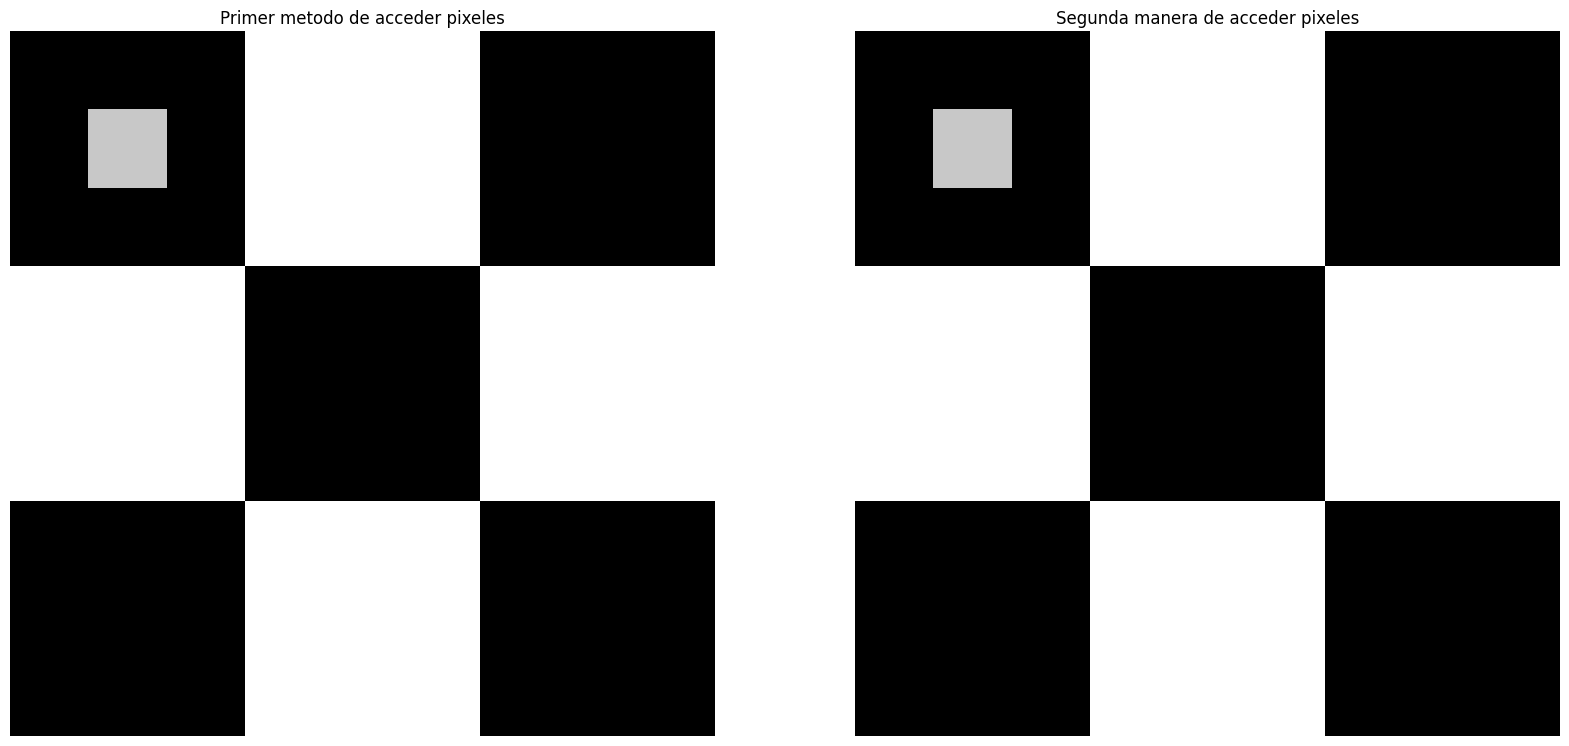

In [4]:
# Primer manera de acceder pixeles
cb_img[2,2] = 200
cb_img[2,3] = 200
cb_img[3,2] = 200
cb_img[3,3] = 200

# Segunda manera de acceder pixeles
cb_img_copy = cb_img.copy()
cb_img_copy[2:3,2:3] = 200

print(cb_img_copy)

imagenes = [cb_img, cb_img_copy]
titulos = ['Primer metodo de acceder pixeles', 'Segunda manera de acceder pixeles']

plot_img(imagenes, titulos)

## Transformaciones de imagen afines y no afines

Las transformaciones son distorsiones geométricas ejecutadas sobre una imagen; las distorsiones no implican fallos, sino una especie de corrección para remediar las dificultades de perspectiva procedentes del lugar de captura de la imagen. Las transformaciones de imagen afines y no afines son los dos tipos de transformaciones de imagen.

La escala, la rotación y la traslación son tres formas de transformaciones afines. Lo más importante que hay que recordar sobre las transformaciones afines es que las líneas son paralelas antes y después de las alteraciones de la imagen.

<center><img src="Demostrativas\OperacionesAfines.png"/></center>

### Translaciones de imágenes usando OpenCV

En visión por computadora, trasladar una imagen implica cambiarla a lo largo de los ejes $x$ e $y$ en una cantidad predeterminada de píxeles. Sean $t_{x}$ y $t_{y}$ los píxeles en los que debe moverse la imagen. Entonces se puede definir una matriz de traslación $M$:


$M =
  \left[ {\begin{array}{cc}
    1 & 0 & t_{x}\\
    0 & 1 & t_{y}\\
  \end{array} } \right]
$

Ahora, hay algunos puntos que debe tener en cuenta al desplazar la imagen por $t_{x}$ y $t_{y}$ valores.

<ul>
<li>Los valores tx positivos desplazan la imagen hacia la derecha, mientras que los negativos la desplazan hacia la izquierda.</li>
<li>Del mismo modo, los valores positivos de ty desplazarán la imagen hacia abajo, mientras que los valores negativos la desplazarán hacia arriba.</li>
</ul>

<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:3: SyntaxWarning: invalid escape sequence '\B'
<>:2: SyntaxWarning: invalid escape sequence '\B'
<>:3: SyntaxWarning: invalid escape sequence '\B'
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_26936\58425541.py:2: SyntaxWarning: invalid escape sequence '\B'
  botw_img = cv2.imread('Recursos\BOTW.jpg', cv2.IMREAD_COLOR)
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_26936\58425541.py:3: SyntaxWarning: invalid escape sequence '\B'
  bnw_img = cv2.imread('Recursos\BOTW.jpg', cv2.IMREAD_GRAYSCALE)


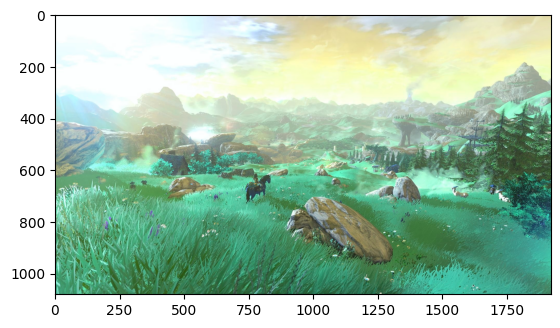

In [6]:
# Leer la imagen
botw_img = cv2.imread('Recursos\BOTW.jpg', cv2.IMREAD_COLOR)
bnw_img = cv2.imread('Recursos\BOTW.jpg', cv2.IMREAD_GRAYSCALE)

plt.imshow(botw_img)

# Conseguir los parametros de ancho y alto de la imagen
alto, ancho = botw_img.shape[:2]

# conseguir los valores de tx y tx para la traslacion
tx, ty = ancho/2, alto/2

# crear matriz de traslacion, se crea un arreglo de NumPy
tras_matriz = np.array([
    [1, 0, tx],
    [0, 1, ty]
], dtype=np.float32)

Ahora, se utiliza el método `warpAffine()` para aplicar la matriz de traslación a la imagen.

#### Sintaxis de Función

``` python
dst = cv2.warpAffine(src, M, dsize, dst, flags)
```

`dst`: Crea una imagen con el mismo tamaño que la fuente y el mismo tipo que `dsize`. 

La función tiene **3 argumento de entrada requerido**, una bandera opcional, y un parametro opcional:


1. `src`: Imagen fuente. Es un argumento **obligatorio**.
2. `M`: Matriz de transformación afín $2 \times 3$. Es un argumento **obligatorio**.
3. `dsize`: Tamaño de imagen de salida. Es un argumento **obligatorio**.
4. `dst`: Imagen de salida que tiene el tamaño `dsize` y el mismo tipo que `src`.
5. `flags`: Combinación de métodos de interpolación y la bandera opcional `WARP_INVERSE_MAP` que significa que M es la transformación inversa.


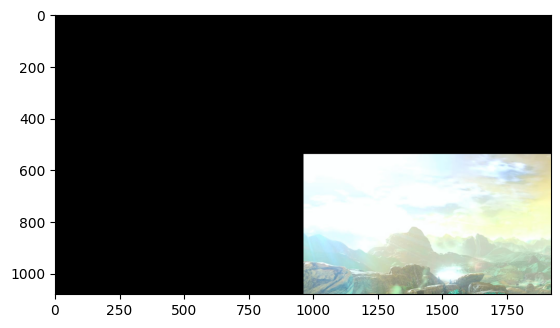

In [7]:
tras_img = cv2.warpAffine(botw_img, tras_matriz, (ancho, alto))

plt.imshow(tras_img)

### Rotación de imágenes usando OpenCV

Mediante la creación de una matriz de transformación $M$, se puede girar una imagen con un ángulo específico $\theta$. Esta matriz suele tener el siguiente formato:

$M =
  \left[ {\begin{array}{cc}
    \cos{\theta} & -\sin{\theta} \\
    \sin{\theta} & \cos{\theta} \\
  \end{array} } \right]
$

Cuando el ángulo es positivo, la imagen gira en sentido contrario a las agujas del reloj. El ángulo debe ser negativo si desea girar la imagen en el sentido de las agujas del reloj en la misma medida.

La rotación es un proceso de tres partes:

<ol>
<li>Primero se debe determinar el centro de rotación. El centro de la imagen que se intenta rotar suele ser dicho centro de rotación.</li>
<li>A continuación, crea la matriz de rotación 2D.</li>
<li>Por último, aplique la transformación afín a la imagen, utilizando la matriz de rotación que creó en el paso anterior.</li>
</ol>

La función `getRotationMatrix2D()` de OpenCV puede utilizarse para generar la matriz de rotación mostrada anteriormente.

#### Sintaxis de Función

``` python
retval = cv2.warpAffine(center, angle, scale)
```

`retval`: Crea una matriz de transformación afín de rotación 2D.

La función calcula la siguiente matriz:

$M =
  \left[ {\begin{array}{cc}
    \alpha & \beta & (1 - \alpha)\cdot c_{x}-\beta \cdot c_{y}\\
    -\beta & \alpha & \beta \cdot c_{y}+(1 - \alpha)\cdot c_{y}\\
  \end{array} } \right]
$

$\alpha = scale \cdot cos(angle)$
<br>
$\beta = scale \cdot sin(angle)$

donde $c_x$ y $c_y$ son las coordenadas a lo largo de las cuales se rota la imagen.

La función tiene **3 argumento de entrada requerido**:

1. `center`: El centro de rotación de la imagen de origen. Es un argumento **obligatorio**.
2. `angle`: Ángulo de rotación en grados. Es un argumento **obligatorio**.
3. `scale`: Factor de escala isotrópico. Es un argumento **obligatorio**.

Se realiza otro ejemplo con la imagen cargada anteriormente.

En primer lugar, determine el punto de rotación, que en este caso será el centro de la imagen. Basta con dividir la anchura y la altura de la imagen por dos. Se calcula una matriz de rotación utilizando el método `getRotationMatrix2D()` una vez se conozca las coordenadas de los píxeles del centro de la imagen.


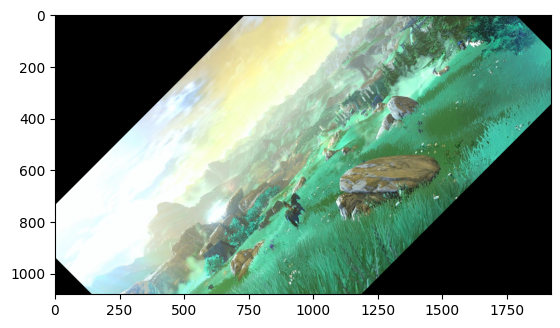

In [9]:
centro = (ancho/2, alto/2)
rot_matriz = cv2.getRotationMatrix2D(centro, 45, 1.0)

rot_img = cv2.warpAffine(botw_img, rot_matriz, (ancho, alto))

plt.imshow(rot_img)

## Redimensionamiento de imágenes

El cambio de tamaño de las imágenes es el proceso de escalarlas. El escalado es útil en muchas aplicaciones de procesamiento de imágenes y aprendizaje automático. Ayuda a reducir la cantidad de píxeles de una imagen, lo que tiene varias ventajas, por ejemplo Puede reducir el tiempo necesario para entrenar una red neuronal, ya que el número de nodos de entrada aumenta con la cantidad de píxeles de una imagen, lo que incrementa la complejidad del modelo.

También ayuda a ampliar la imagen. Para satisfacer los requisitos de tamaño, a menudo tenemos que ajustar la imagen, ya sea reduciéndola o escalándola. Para escalar una imagen, OpenCV incluye numerosos algoritmos de interpolación.

### Cambiar el tamaño de las imágenes en OpenCV

La función **`resize`** redimensiona la imagen `src` hasta o desde el tamaño suministrado. El tamaño y el tipo se obtienen de los parámetros `src`, `dsize`, `fx` y `fy`.

#### Sintaxis de la función

```python
dst = resize( src, dsize, dst, fx, fy, interpolation)
```

`dst`: imagen de salida; tiene el tamaño <i>`dsize`</i> (cuando es distinto de cero) o el tamaño determinado a partir de **`src.size()`**, `fx`, y `fy`; tiene el mismo tipo que `src`.

La función requiere **dos** argumentos:

1.`src`: fuente de la imagen
2. `dsize`: tamaño de salida de la imagen

Los argumentos opcionales que se utilizan con frecuencia son

1. `fx`: Factor de escala a lo largo del eje horizontal; cuando es igual a 0, se calcula como (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚠𝚒𝚍𝚝𝚑/𝚜𝚛𝚌.𝚌𝚘𝚕𝚜.
2. `fy`: Factor de escala a lo largo del eje vertical; cuando es igual a 0, se calcula como (𝚍𝚘𝚞𝚋𝚕𝚎)𝚍𝚜𝚒𝚣𝚎.𝚑𝚎𝚒𝚐𝚑𝚝/𝚜𝚛𝚌.𝚛𝚘𝚠𝚜.

El tamaño de la imagen de salida es `dsize` (cuando es distinto de cero) o el tamaño determinado a partir de `src.size()`, `fx` y `fy`; el tipo de `dst` es el mismo que el de `src`.

#### Ejemplo 1. Cambiar el tamaño especificando la anchura y la altura

Vamos a cambiar el tamaño de la imagen en este primer ejemplo dando una nueva anchura y altura que reducirá la escala de la imagen. En el siguiente código:

<ul>
<li>Elegimos 960 como la anchura deseada y 540 como la altura deseada.</li>
<li>El método <i>resize()</i> requiere que estos dos valores se unan en un vector 2D.</li>
</ul>

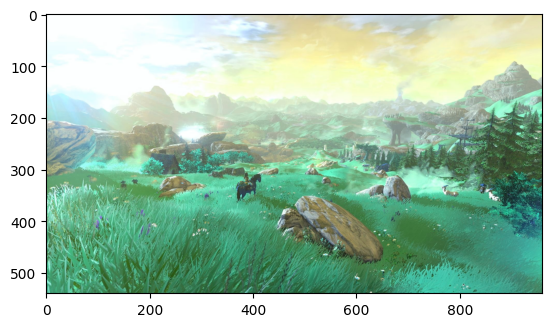

In [8]:
# Set rows and columns
# lets downsize the image using new  width and height

nuevo_ancho = 960
nuevo_alto = 540
nuevo_dsize = (nuevo_ancho, nuevo_alto)
img_rsize = cv2.resize(botw_img, nuevo_dsize)

plt.imshow(img_rsize)

### Cambiar el tamaño con un factor de escala

Así que ahora vamos a cambiar el tamaño de la imagen utilizando un factor de escala. Pero antes de seguir adelante, se debe entender lo que es un factor de escala.

Un factor de escalado, también conocido como factor de escala, es un número que escala o multiplica una cantidad, en este ejemplo la anchura y la altura de una imagen. Ayuda a mantener la relación de aspecto y la calidad de visualización, para que la imagen no parezca deformada al subir o bajar la escala.

In [10]:
# Aumentar la imagen 1.2 veces especificando los dos factores de escala
scale_up_x = 1.2
scale_up_y = 1.2
# Reducir la imagen 0.6 veces especificando un único factor de escala.
scale_down = 0.6

scaled_f_down = cv2.resize(botw_img, None, fx= scale_down, fy= scale_down, interpolation= cv2.INTER_LINEAR)
scaled_f_up = cv2.resize(botw_img, None, fx= scale_up_x, fy= scale_up_y, interpolation= cv2.INTER_LINEAR)

En el fragmento de Python anterior:

<ul>
<li>Se definen nuevos factores de escala a lo largo de los ejes horizontal y vertical.</li>
<li>La definición de los factores de escala elimina la necesidad de puntos adicionales de anchura y altura. Como resultado, dejamos <code>dsize</code> como <b><code>None</code></b>.</li>
</ul>

In [11]:
print(f'Dimensiones originales de la imagen {botw_img.shape[0:2]}')
print(f'Dimensiones de imagen escalada hacia arriba {scaled_f_down.shape[0:2]}')
print(f'Dimensiones de imagen escalada hacia abajo {scaled_f_up.shape[0:2]}')

Dimensiones originales de la imagen (1080, 1920)
Dimensiones de imagen escalada hacia arriba (648, 1152)
Dimensiones de imagen escalada hacia abajo (1296, 2304)


## Recortes y Regiones de Interes

### Recorte de imágenes

El recorte es el proceso de eliminar los elementos o regiones innecesarios de una imagen. O incluso para llamar la atención sobre un determinado aspecto de una imagen.

No hay un método de recorte particular en OpenCV; en su lugar, se utiliza el corte de matrices NumPy. Cada imagen leída se almacena en una matriz 2D (para cada canal de color). Basta con introducir la altura y la anchura (en píxeles) de la región a recortar.

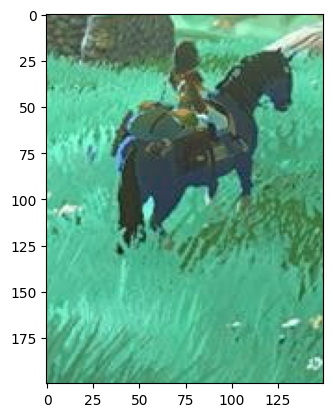

In [12]:
imagen_recortada = botw_img[600:800, 700:850] # Rebanar para recortar la imagen

plt.imshow(imagen_recortada)

Este método no es necesariamente confliabe, ya que se debe de conocer la vecindad de píxeles en donde se encuentra la región deseada.

### Región de interes

Una región de interés (comúnmente abreviada ROI) es una colección de muestras dentro de un conjunto de datos que han sido designadas para un propósito específico. La idea del ROI se emplea ampliamente en una variedad de aplicaciones. En la imagen médica, por ejemplo, se pueden establecer los límites de un tumor en una imagen o en un volumen para medir su tamaño. El ROI establece los límites de un elemento examinado en la visión por ordenador y el reconocimiento óptico de caracteres. Las etiquetas simbólicas (textuales) se aplican a los ROI en varias aplicaciones para explicar su contenido de forma concisa.

Para seleccionar un ROI, se puede utilizar el metodo `selectROI`. Usando esta función en OpenCV, podemos elegir con precisión y manualmente la región de interés de una imagen, permitiéndonos realizar una variedad de operaciones para esa área exacta. Podemos utilizar esa región como entrada para otro trabajo. También podemos utilizar las coordenadas para crear una figura de seguimiento (rectángulo) en la región, o podemos recortar una imagen con precisión y flexibilidad.

#### Sintaxis de Función

``` python
retval = cv2.selectROI(windowName, img, showCrosshair, fromCenter)
```

`retval`: La función abre una ventana en la que los usuarios pueden utilizar el ratón para elegir un ROI. Si se cancela la selección, devuelve el ROI seleccionado o un rectángulo vacío.

La función tiene **2 argumento de entrada requerido**, una bandera opcional, y un parametro opcional:


1. `windowName`: Nombre de la ventana donde se mostrará la selección del ROI. Es un argumento **obligatorio**.
2. `img`: Imagen de seleccion. Es un argumento **obligatorio**.
3. `showCrosshair`: Si es verdadero, se mostrará la retícula del rectángulo elegido.
4. `fromCenter`: Si es verdadero, el centro de la selección será el mismo que la ubicación inicial del ratón. En la situación contraria, la esquina del rectángulo seleccionado corresponderá a la ubicación inicial del ratón.
 
 ## Operaciones aritméticas para aclarar y oscurecer las imágenes

Dado que una imagen digital puede representarse como datos en una matriz, la aritmética de la imagen es simplemente una suma y una resta matricial. Las operaciones aritméticas/lógicas de la imagen se realizan píxel a píxel entre dos o más fotografías. Cuando se restan dos fotografías, se crea una nueva imagen con un píxel en las coordenadas (x, y) que es la diferencia entre los píxeles del mismo lugar en las dos imágenes que se restan. Las operaciones matemáticas más útiles para mejorar las imágenes son la resta y la suma.

Las operaciones aritméticas en OpenCV consisten esencialmente en sumar o restar matrices de la imagen, con el resultado de subir o bajar el brillo. Esto se puede lograr mediante los comandos de OpenCV `cv2.add` y `cv2.subtract`.

### Sintaxis de Funciones

#### Suma

``` python
retval = cv2.add(src1, src2, dst, mask, dtype)
```

`retval`: La función retorna el resultado de la suma de matrices o suma de matriz con valor escalar.

La función tiene **2 argumento de entrada requerido**, una bandera opcional, y un parametro opcional:


1. `src1`: Nombre de la imagen a la que se le aplicará la suma. Es un argumento **obligatorio**.
2. `scr2`: Nombre de la imagen o escalar a sumar. Es un argumento **obligatorio**.
3. `mask`: Máscara de operación opcional - matriz de 8 bits de un solo canal, que especifica los elementos de la matriz de salida que se van a cambiar.
4. `dtype`: Profundidad opcional de la matriz de salida.

#### Resta

``` python
retval = cv2.subtract(src1, src2, dst, mask, dtype)
```

`retval`: La función retorna el resultado de la resta de matrices o resta de matriz con valor escalar.

La función tiene **2 argumento de entrada requerido**, una bandera opcional, y un parametro opcional:


1. `src1`: Nombre de la imagen a la que se le aplicará la resta. Es un argumento **obligatorio**.
2. `scr2`: Nombre de la imagen o escalar a resta. Es un argumento **obligatorio**.
3. `mask`: Máscara de operación opcional - matriz de 8 bits de un solo canal, que especifica los elementos de la matriz de salida que se van a cambiar.
4. `dtype`: Profundidad opcional de la matriz de salida.

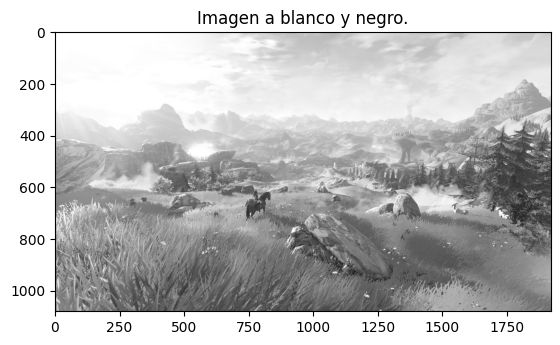

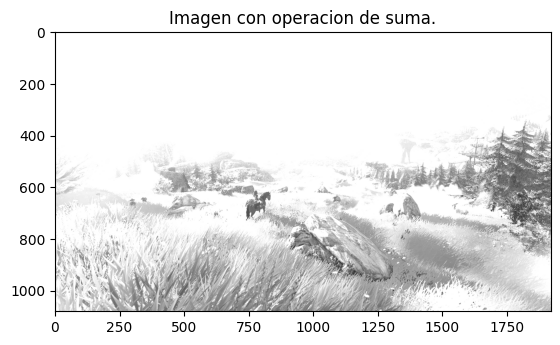

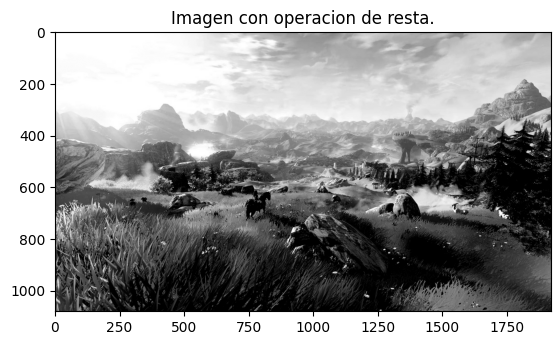

In [13]:
img_bright = cv2.add(bnw_img, 100)
img_dark = cv2.subtract(bnw_img, 100)

plt.figure(1)
plt.title('Imagen a blanco y negro.')
plt.imshow(bnw_img, cmap= 'gray')

plt.figure(2)
plt.title('Imagen con operacion de suma.')
plt.imshow(img_bright, cmap= 'gray')

plt.figure(3)
plt.title('Imagen con operacion de resta.')
plt.imshow(img_dark, cmap= 'gray')
plt.show()

## Ratón y Trackbar en OpenCV GUI

El puntero del mouse es un componente clave en una interfaz gráfica de usuario (GUI). Sin él, no se puede pensar en interactuar con una GUI. Por lo tanto, vamos a introducir las funciones incorporadas para el mouse y <i>trackbar</i> en OpenCV. Vamos a demostrar cómo utilizar una <i>trackbar</i> para ajustar el brillo de una imagen.

<i>Trackbar</i> es un elemento GUI (Graphical User Interface) que permite al usuario seleccionar un valor específico dentro de un rango de valores deslizando linealmente un deslizador. Es similar al desplazamiento pero limita al usuario a seleccionar un valor específico con sus límites mínimo y máximo. La <i>trackbar</i> es útil cuando queremos retocar algunos ajustes e intentar cambiar una imagen basándonos en ello. Nos permite establecer algunos valores de forma dinámica cuando estamos probando entre un conjunto de variables.

Para el uso de una <i>trackbar</i>, se deben de hacer varios pasos. El primer paso es crear una nueva ventana, lo que puede hacerse mediante el método `cv2.namedWindow()`. La función crea una ventana que puede utilizarse como marcador de posición para imágenes y barras de seguimiento. Las ventanas creadas se denominan por su nombre.

#### Sintaxis de Función

``` python
cv2.namedWindow(winName, flags)
```

La función tiene **1 argumento de entrada requerido** y una bandera opcional:


<ol>
<li><code>winName</code>: Nombre de la ventana en el título de la ventana que puede utilizarse como identificador de la ventana. Es un argumento <b>obligatorio</b>.
<br>
<li><code>flags</code>: Banderas de la ventana.
    <ul>
    <b>Soporta banderas adicionales:</b>
    <li><code>cv2.WINDOW_NORMAL</code>: El usuario puede cambiar el tamaño de la ventana (sin restricciones) / también se utiliza para cambiar una ventana a pantalla completa a un tamaño normal.
    <li><code>cv2.WINDOW_AUTOSIZE</code>: El usuario no puede redimensionar la ventana, el tamaño está limitado por la imagen mostrada.
    <li><code>cv2.WINDOW_FULLSCREEN</code>: Cambiar la ventana a pantalla completa.
    <li><code>cv2.WINDOW_FREERATIO</code>: La imagen se expande todo lo que puede (sin restricción de proporción).
    <li><code>cv2.WINDOW_KEEPRATIO</code>: La imagen se expande todo lo que puede (se respeta la proporción de la imagen).
    <li><code>cv2.WINDOW_GUI_EXPANDED </code>: Barra de estado y barra de herramientas.
    </ul>
<br>

El siguiente paso es crear una trackbar mediante le uso de la función `cv2.createTrackbar()`. La función `cv2.createTrackbar()` crea una <i>trackbar</i> (un control deslizante o de rango) con el nombre y rango especificados, asigna un valor variable para que sea una posición sincronizada con la trackbar y especifica una función creada por el usuario para el callback `onChange` que se llamará al cambiar la posición de la trackbar. El trackbar creado se muestra en la ventana `winname` especificada.

#### Sintaxis de Función

``` python
cv2.createTrackbar(trackbarname, winname, value, count, onChange)
```

La función tiene **5 argumento de entrada requerido**:


<ol>
<li><code>trackbarname</code>: Nombre de la trackbar creada. Es un argumento <b>obligatorio</b>.
<br>
<li><code>winname</code>: Nombre de la ventana que se utilizará como padre de la trackbar creada. Es un argumento <b>obligatorio</b>.
<li><code>value</code>: Puntero opcional a una variable entera cuyo valor refleja la posición del deslizador. Al crearse, la posición del deslizador se define mediante esta variable. Es un argumento <b>obligatorio</b>.
<li><code>count</code>: Posición máxima del deslizador. La posición mínima es siempre 0. Es un argumento <b>obligatorio</b>.
<li><code>onChange</code>: Puntero a la función que se llamará cada vez que el deslizador cambie de posición. Esta función debe ser prototipada como void Foo(int,void*); , donde el primer parámetro es la posición del trackbar y el segundo parámetro son los datos del usuario. Si el callback es el puntero NULL, no se llama a ningún callback, sino que sólo se actualiza el valor. Es un argumento <b>obligatorio</b>.
</ol>

A continuación, se muestra un ejemplo de como crear una ventana con un trackbar.

In [ ]:
# Crear una imagen monocanal negra de tamaño 250x250 pixeles
image = np.zeros((250, 250), dtype=np.uint8)

# Funcion de usuario que actualiza la intensidad de la imagen
def act_intensity(value):
    # Declarar la imagen como una variable global
    global image

    # Actualizar la imagen
    image = np.ones(image.shape, dtype=np.uint8) * value
    cv2.imshow('Ventana de intensidad de trackbar', image)

cv2.namedWindow('Ventana de intensidad de trackbar', cv2.WINDOW_GUI_EXPANDED)
cv2.createTrackbar('Trackbar de intensidad','Ventana de intensidad de trackbar',0,255,act_intensity)

cv2.imshow('Ventana de intensidad de trackbar', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Trabajar con multiples <i>Trackbars</i>

Para trabajar con multiples <i>trackbars</i>, sin la necesidad de crear varias funciones <i>callback</i>, se puede utilizar la función <code>cv2.getTrackbarPos()</code>. La función devuelve la posición actual de la trackbar especificada.

#### Sintaxis de Función

``` python
retval = cv2.getTrackbarPos(trackbarname, winname)
```

`retval`: La función devuelve la posición actual de la trackbar especificada en un valor numérico (entero o flotante).

La función tiene **2 argumento de entrada requeridos**:

<ol>
<li><code>trackbarname</code>: Nombre de la trackbar. Es un argumento <b>obligatorio</b>.
<br>
<li><code>winname</code>: Nombre de la ventana que se utilizará como padre de la trackbar. Es un argumento <b>obligatorio</b>.

In [4]:
# Crear una imagen multicanal negra de tamaño 250x250 pixeles
image = np.zeros((250, 250, 3), dtype=np.uint8)

# Funcion de usuario que actualiza la intensidad de la imagen
def callback(value):
    # Declarar la imagen como una variable global
    global image
    red = cv2.getTrackbarPos('Rojo','Colores')
    green = cv2.getTrackbarPos('Verde','Colores')
    blue = cv2.getTrackbarPos('Azul','Colores')

    color = np.array([blue, green, red], dtype=np.uint8)
    # Actualizar la imagen
    image = np.full(image.shape, fill_value=color, dtype=image.dtype)
    cv2.imshow('Colores', image)

cv2.namedWindow('Colores', cv2.WINDOW_GUI_EXPANDED)
cv2.createTrackbar('Rojo','Colores',0,255,callback)
cv2.createTrackbar('Verde','Colores',0,255,callback)
cv2.createTrackbar('Azul','Colores',0,255,callback)

cv2.imshow('Colores', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Ejercicios

<br>
1. Diseñe un programa en Python en el cual se cumplan los siguientes requisitos:
    <ul>
    <li>Cargue una imagen del disco duro.</il>
    <li>Aplique dos operaciones de transformacion afin a la imagen</li>
    <li>La imagen debe de ser mostrada en la ventana creada con el nombre "<i>Ejercicio 4.1</i>".</li>
    </ul>
<br>
2. Diseñe un programa en Python en el cual se cumplan los siguientes requisitos:
    <ul>
    <li>Cargue una imagen del disco duro.</il>
    <li>Crear una ROI que abarque elementos de interes en la imagen.</li>
    <li>La imagen debe de ser mostrada en la ventana creada con el nombre "<i>Ejercicio 4.2</i>" hasta que se presione la tecla <i>ESC</i>.</li>
    </ul>
<br>
3. Diseñe un programa en Python en el cual se cumplan los siguientes requisitos:
    <ul>
    <li>Cree una ventana con dos <i>trackbars</i>, uno para modificar el contraste y otro para modificar el brillo de una imagen.</li>
    <li>Cargue una imagen del disco duro.</il>
    <li>Utilice la fórmula g(i,j)=α⋅f(i,j)+β para cambiar el contraste y brijjo de la imagen, donde α es contraste y β es brillo.</li>
    <li>La imagen debe de ser mostrada en la ventana creada con el nombre "<i>Ejercicio 4.3</i>".</li>
    <li>Las imagenes se mostraran indefinidamente hasta que se presione una tecla.</li>
    </ul>